In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [3]:

df = pd.read_csv("D:\IMDB.csv")
print(df.head())


   Unnamed: 0  index     tconst titleType                primaryTitle  \
0           0      0  tt0102926     movie    The Silence of the Lambs   
1           1      1  tt0103064     movie  Terminator 2: Judgment Day   
2           2      3  tt0110357     movie               The Lion King   
3           3      4  tt0110912     movie                Pulp Fiction   
4           4      5  tt0111161     movie    The Shawshank Redemption   

                originalTitle  isAdult  startYear endYear runtimeMinutes  ...  \
0    The Silence of the Lambs        0       1991      \N            118  ...   
1  Terminator 2: Judgment Day        0       1991      \N            137  ...   
2               The Lion King        0       1994      \N             88  ...   
3                Pulp Fiction        0       1994      \N            154  ...   
4    The Shawshank Redemption        0       1994      \N            142  ...   

  averageRating  numVotes  ordering                       title region  \


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\yokes\AppData\Local\Temp\ipykernel_1964\2000633404.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\IMDB.csv")


In [5]:
print(df.info())

print(df.isnull().sum())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7850 entries, 0 to 7849
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7850 non-null   int64  
 1   index            7850 non-null   int64  
 2   tconst           7850 non-null   object 
 3   titleType        7850 non-null   object 
 4   primaryTitle     7850 non-null   object 
 5   originalTitle    7850 non-null   object 
 6   isAdult          7850 non-null   int64  
 7   startYear        7850 non-null   int64  
 8   endYear          7850 non-null   object 
 9   runtimeMinutes   7850 non-null   object 
 10  genres           7850 non-null   object 
 11  averageRating    7850 non-null   float64
 12  numVotes         7850 non-null   int64  
 13  ordering         7850 non-null   int64  
 14  title            7850 non-null   object 
 15  region           7850 non-null   object 
 16  language         7850 non-null   object 
 17  types         

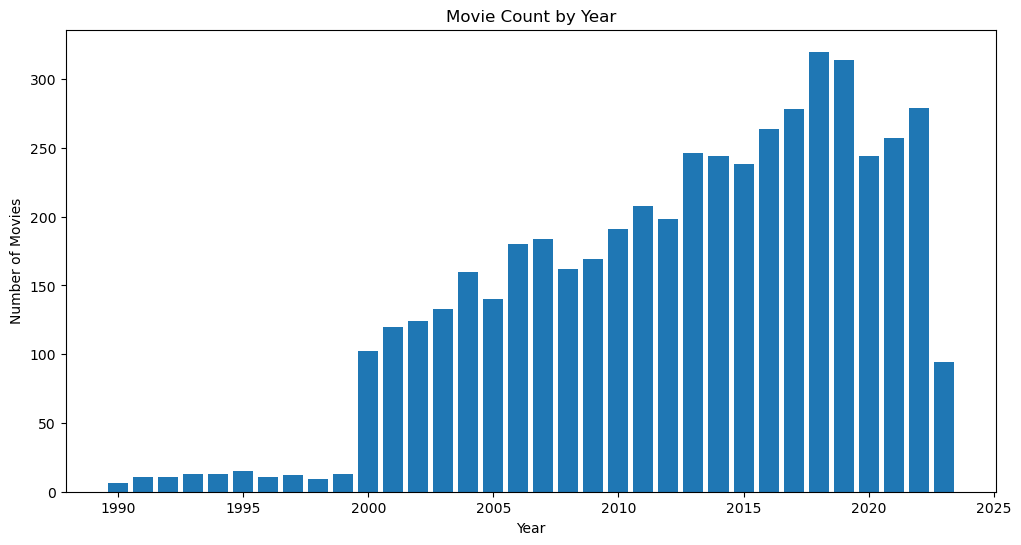

In [9]:
# Count movies by year 
movie_count_by_year = df[df['titleType'] == 'movie'].groupby('startYear').size() 
 
# Create the bar chart 
plt.figure(figsize=(12, 6)) 
plt.bar(movie_count_by_year.index, movie_count_by_year.values) 
plt.xlabel('Year') 
plt.ylabel('Number of Movies') 
plt.title('Movie Count by Year') 
plt.show()


<Axes: xlabel='startYear'>

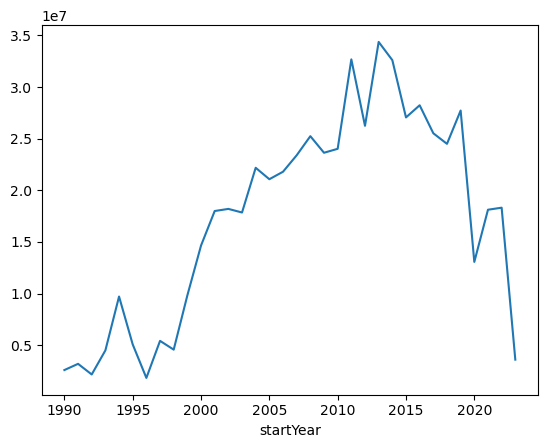

In [13]:
# Number of votes per yer 
df_numvotes = df.groupby('startYear')['numVotes'].sum() 
df_numvotes.plot.line(x='startYear')


In [15]:
# Top 10 highest-rated movies
top_movies = df.nlargest(10, 'averageRating')[['primaryTitle', 'averageRating', 'startYear']]
print(top_movies)


                   primaryTitle  averageRating  startYear
132   The Gods 2: The Dark Side            9.5       2023
1536               Breaking Bad            9.5       2008
4764            Planet Earth II            9.5       2016
5399                      Bluey            9.5       2018
99                        Simon            9.4       2023
523            Band of Brothers            9.4       2001
1424               Planet Earth            9.4       2006
5304                  Chernobyl            9.4       2019
4      The Shawshank Redemption            9.3       1994
779                    The Wire            9.3       2002


In [17]:

indian_tamil_movies = df[(df['region'] == 'IN') & (df['language'] == 'ta')].nlargest(10, 'averageRating')[['primaryTitle', 'averageRating', 'startYear']]
print("\nTop 10 Indian Tamil Movies:")
print(indian_tamil_movies)



Top 10 Indian Tamil Movies:
Empty DataFrame
Columns: [primaryTitle, averageRating, startYear]
Index: []


In [20]:
indian_language_count = df[df['region'] == 'IN']['language'].value_counts()
print("\nNumber of movies by language in India:")
print(indian_language_count)



Number of movies by language in India:
language
en    5641
Name: count, dtype: int64


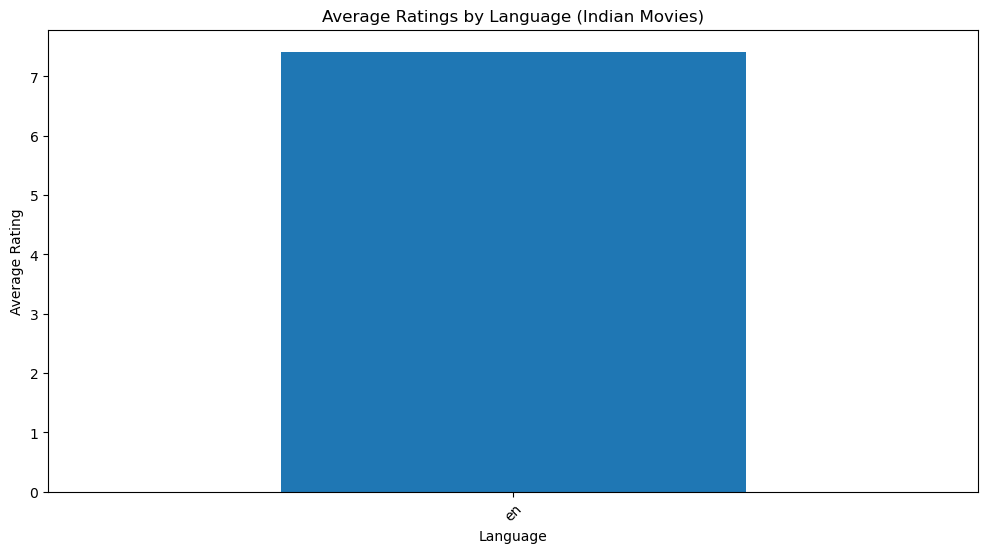

In [22]:
plt.figure(figsize=(12, 6))
df[df['region'] == 'IN'].groupby('language')['averageRating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Ratings by Language (Indian Movies)')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [24]:
# For Indian movies
indian_movies = df[df['region'] == 'IN'].nlargest(10, 'averageRating')[['primaryTitle', 'averageRating', 'startYear', 'language']]
print("Top 10 Indian Movies:")
print(indian_movies)

# For Tamil movies
tamil_movies = df[df['language'] == 'ta'].nlargest(10, 'averageRating')[['primaryTitle', 'averageRating', 'startYear']]
print("\nTop 10 Tamil Movies:")
print(tamil_movies)

Top 10 Indian Movies:
                            primaryTitle  averageRating  startYear language
1536                        Breaking Bad            9.5       2008       en
4764                     Planet Earth II            9.5       2016       en
5399                               Bluey            9.5       2018       en
523                     Band of Brothers            9.4       2001       en
1424                        Planet Earth            9.4       2006       en
5304                           Chernobyl            9.4       2019       en
779                             The Wire            9.3       2002       en
1110          Avatar: The Last Airbender            9.3       2005       en
2250  Scam 1992: The Harshad Mehta Story            9.3       2020       en
2785            9/11: One Day in America            9.3       2021       en

Top 10 Tamil Movies:
Empty DataFrame
Columns: [primaryTitle, averageRating, startYear]
Index: []
